## Problem #1: Investing and Bayes' Theorem

Bayes’ Theorem states the following for any two events A and B:

P(A|B) = P(A)*P(B|A) / P(B)

where:

* P(A|B): The probability of event A, given event B has occurred.
* P(B|A): The probability of event B, given event A has occurred.
* P(A): The probability of event A.
* P(B): The probability of event B.

Assume that there are two investment options, A and B. The probability of generating positive returns from investment A is 81%, and the probability of generating positive returns from investment B is 62%. Also, the possibility of investment B providing a positive return when investment A also provides a positive return is 11%.

**Instructions:** Using the provided information, determine the probability of investment A providing a positive return when investment B also provides a positive return. Return pAB formatted as a percentage to two decimal places (30.24%, not 0.3024). 

In [3]:
# Create function to calculate Bayes' Theorem
def bayesTheorem(pA, pB, pBA):
    # Add your code here, returning a percentage representing pAB
    pAB = (pA * pBA) / pB
    return pAB

# Define probabilities
pA = .81
pB = .62
pBA = .11

# Use function to calculate conditional probability
print('{:.2%}'.format(bayesTheorem(pA, pB, pBA)))

14.37%


## Problem #2: Daily Returns of Stocks

**Instructions:** Follow the steps below and add code where needed to complete problem two. 

Install the yfinance package by running the code below. This will download market data from Yahoo! Finance's API.

In [4]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Choose five well-known stocks (ex: AAPL, META, AMZN) and add their tickers to tickers_list. We are going to import daily stock price data for those five stocks over the past year. Then print out the first five rows of the data. 

In [5]:
import pandas as pd
# Add the stock tickers you chose to the list
tickers_list = ['AAPL', 'QQQ', 'AMZN', 'HD', 'WMT']

# Get the data for these stocks for the past year (2022-2023)
import yfinance as yf
data = yf.download(tickers_list,start ='2022-1-1', end='2023-1-1')['Adj Close']

# Print the first 5 rows of the data
# Make sure all stocks have do not have "NaN" values, else choose a new stock
print(data.head())


print('\n\n', data.isna().sum())
print(data.shape)

[*********************100%***********************]  5 of 5 completed
                                 AAPL        AMZN          HD         QQQ  \
Date                                                                        
2022-01-03 00:00:00-05:00  180.959732  170.404495  398.611511  398.741425   
2022-01-04 00:00:00-05:00  178.663071  167.522003  402.708435  393.569519   
2022-01-05 00:00:00-05:00  173.910660  164.356995  397.245850  381.478638   
2022-01-06 00:00:00-05:00  171.007507  163.253998  395.802185  381.210602   
2022-01-07 00:00:00-05:00  171.176514  162.554001  383.950287  377.081024   

                                  WMT  
Date                                   
2022-01-03 00:00:00-05:00  142.411377  
2022-01-04 00:00:00-05:00  139.802414  
2022-01-05 00:00:00-05:00  141.692673  
2022-01-06 00:00:00-05:00  141.298889  
2022-01-07 00:00:00-05:00  142.647675  


 AAPL    0
AMZN    0
HD      0
QQQ     0
WMT     0
dtype: int64
(251, 5)


Now we are going to estimate the daily log returns for each stock. The logarithmic return is a way of calculating the rate of return on an investment.

For example, if a stock is priced at 3.570 USD per share at the close on one day, and at 3.575 USD per share at the close the next day, then the logarithmic return is: ln(3.575/3.570) = 0.0014, or 0.14%.

You will need to use two functions to calculate the daily log returns using the list data you just created. Look into Numpy functions log() and diff(). Print out the last five rows of returns. 

In [6]:
import numpy as np
    
# Calculate daily log returns using log() and diff() 
returns = np.diff(np.log(data), axis = 0)

# Print out the first five rows of returns
print(returns[-5:, :])


[[-0.00280204  0.01727444  0.00822251  0.0022466   0.00201921]
 [-0.01397557 -0.02626569  0.00256933 -0.01423913  0.00027814]
 [-0.03116586 -0.01480072 -0.01202627 -0.01329068 -0.0176785 ]
 [ 0.02793062  0.02843566  0.01471398  0.02408289  0.00606833]
 [ 0.00246584 -0.00214057 -0.01430241 -0.0006007  -0.00253575]]


Now we will output the covariance matrix. From the CSE 801A slides from last week, we learned that a covariance matrix indicates the degree to which two variables vary together. 

Covariance provides the a measure of strength of correlation between two variable or more set of variables. The covariance matrix element Cij is the covariance of xi and xj. The element Cii is the variance of xi. 

*   If COV(xi, xj) = 0 then the variables are uncorrelated
*   If COV(xi, xj) > 0 then the variables are positively correlated
*   If COV(xi, xj) < 0 then the variables are negatively correlated

Add code to generate a covariance matrix from the returns and a heatmap using seaborn to visualize the covariance matrix. When you are done, it should look similar to this: 

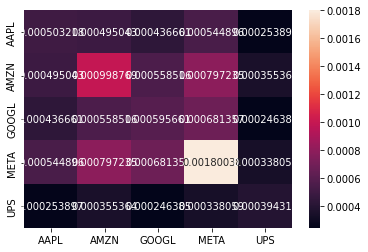


(5, 5)


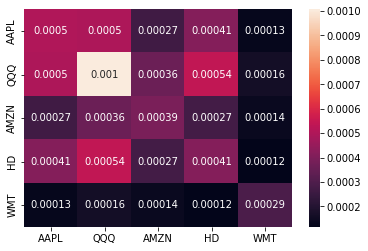

In [7]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

# Generate covariance matrix
cov_matrix = 1/(len(returns)-1) * returns.T @ returns


print(cov_matrix.shape)

x_labels = ['AAPL', 'QQQ', 'AMZN', 'HD', 'WMT']
y_labels = ['AAPL', 'QQQ', 'AMZN', 'HD', 'WMT']


# Generate heatmap using seaborn and matplotlib to visualize the covariance matrix
sn.heatmap(cov_matrix, annot = True, xticklabels = x_labels, yticklabels = y_labels)

Explain the results of your covariance matrix heatmap below in a few sentences. 

The results of the covariance matrix heatmap are that the variables with a darker square have a weaker correlation. The variables with a a ligher square have a strong correlation. Meaning that the strong correlations market changes move closer together while the weaker correlations move less in sync.

Next, calculate the mean returns for each stock in the returns list. You can find a function in Numpy to do this for you. 

In [8]:
# Calculate mean returns for each stock
avg_returns = np.mean(returns, axis =0)
avg_returns

array([-1.32511531e-03, -2.82943278e-03, -9.30752716e-04, -1.61505906e-03,
       -1.74913909e-05])

We would like to visualize the daily returns of the stocks. Using matplotlib, plot the returns. Make sure to include a label for the x axis called "Date", a label for the y axis called "Log Returns in Dollars", a title called "Stock Daily Returns", and a legend for the stock tickers you chose. 

When you are done, your plot should look like this: 

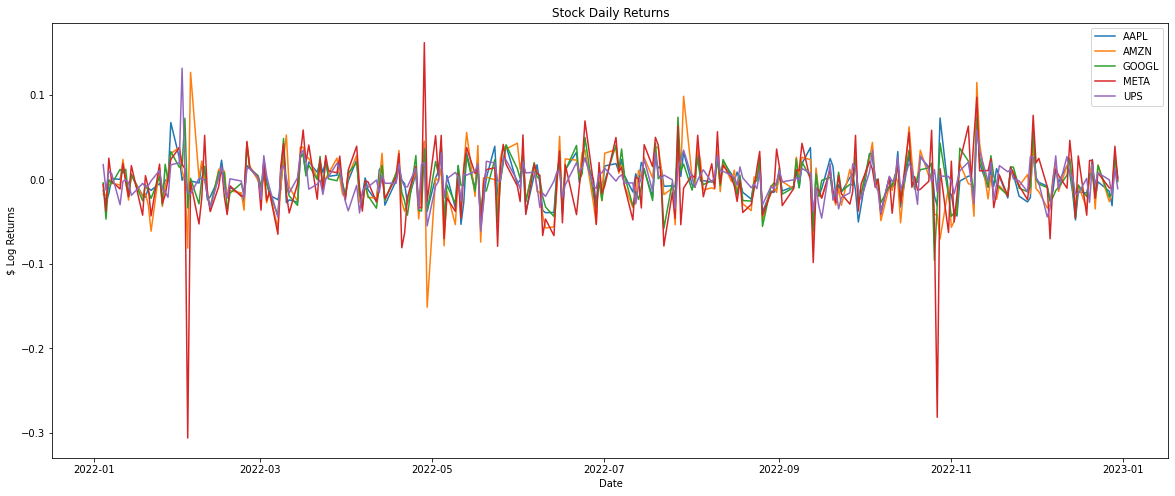

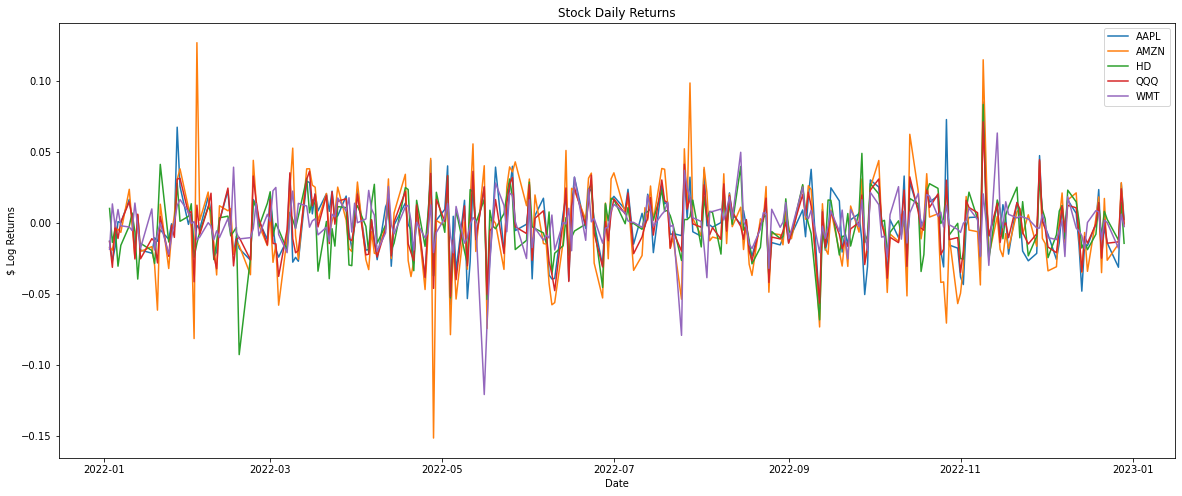

In [57]:
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot returns
plt.figure(figsize=(20,8))
data = data[:-1]

plt.plot(data.index, returns)
plt.xlabel('Date')
plt.ylabel('$ Log Returns')
plt.title('Stock Daily Returns')
plt.legend(data)
plt.show()
